In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("Data_Train.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
category=['Airline','Source','Destination','Additional_Info']

In [7]:
for i in category:
    print(i,data[i].unique())
    print('------------------------------------------------------------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
------------------------------------------------------------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
------------------------------------------------------------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
------------------------------------------------------------------------------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
------------------------------------------------------------------------------------


In [8]:
data['Date_of_Journey']=data['Date_of_Journey'].str.split('/')

In [9]:
data['Date_of_Journey']

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [10]:
data['Date']=data['Date_of_Journey'].str[0]
data['Month']=data['Date_of_Journey'].str[1]
data['Year']=data['Date_of_Journey'].str[2]

In [11]:
m=data['Route'].str.split('→')
m

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [12]:
data['city1']=m.str[0]
data['city2']=m.str[1]
data['city3']=m.str[2]
data['city4']=m.str[3]
data['city5']=m.str[4]
data['city6']=m.str[5]

In [13]:
n=data['Dep_Time'].str.split(':')
n

0        [22, 20]
1        [05, 50]
2        [09, 25]
3        [18, 05]
4        [16, 50]
           ...   
10678    [19, 55]
10679    [20, 45]
10680    [08, 20]
10681    [11, 30]
10682    [10, 55]
Name: Dep_Time, Length: 10683, dtype: object

In [14]:
data['Dep_Hour']=n.str[0]
data['Dep_Min']=n.str[1]

In [15]:
o=data['Arrival_Time'].str.split(' ')
o

0        [01:10, 22, Mar]
1                 [13:15]
2        [04:25, 10, Jun]
3                 [23:30]
4                 [21:35]
               ...       
10678             [22:25]
10679             [23:20]
10680             [11:20]
10681             [14:10]
10682             [19:15]
Name: Arrival_Time, Length: 10683, dtype: object

In [16]:
data['Arriv_Date']=o.str[1]


In [17]:
data['Arriv_Time']=o.str[0]
p=data['Arriv_Time'].str.split(':')
p


0        [01, 10]
1        [13, 15]
2        [04, 25]
3        [23, 30]
4        [21, 35]
           ...   
10678    [22, 25]
10679    [23, 20]
10680    [11, 20]
10681    [14, 10]
10682    [19, 15]
Name: Arriv_Time, Length: 10683, dtype: object

In [18]:
data['Arriv_Hour']=p.str[0]
data['Arriv_Min']=p.str[1]

In [19]:
q=data['Duration'].str.split(' ')
q

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10678    [2h, 30m]
10679    [2h, 35m]
10680         [3h]
10681    [2h, 40m]
10682    [8h, 20m]
Name: Duration, Length: 10683, dtype: object

In [20]:
data['Travel_Hour']=q.str[0]

In [21]:
data['Travel_Hour']=data['Travel_Hour'].str.split('h')

In [22]:
data['Travel_Hour']=data['Travel_Hour'].str[0]

In [23]:
data['Travel_Min']=q.str[1]

In [24]:
data['Travel_Min']=data['Travel_Min'].str.split('m')
data['Travel_Min']=data['Travel_Min'].str[0]

In [25]:
data['Total_Stops'].replace('non-stop','0',inplace=True)


In [26]:
data['Total_Stops'].str.split(' ')

0               [0]
1        [2, stops]
2        [2, stops]
3         [1, stop]
4         [1, stop]
            ...    
10678           [0]
10679           [0]
10680           [0]
10681           [0]
10682    [2, stops]
Name: Total_Stops, Length: 10683, dtype: object

In [27]:
data['Total_Stops']=data['Total_Stops'].str[0]

In [28]:
data.drop(['Date_of_Journey','Route','Duration','Arrival_Time','Dep_Time',],axis=1,inplace=True)

In [29]:
data.drop(['city5','city6'],axis=1,inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  object
 7   Month            10683 non-null  object
 8   Year             10683 non-null  object
 9   city1            10682 non-null  object
 10  city2            10682 non-null  object
 11  city3            7191 non-null   object
 12  city4            1566 non-null   object
 13  Dep_Hour         10683 non-null  object
 14  Dep_Min          10683 non-null  object
 15  Arriv_Date       4335 non-null   object
 16  Arriv_Time       10683 non-null  object
 17  Arriv_Hour       10683 non-null

In [31]:
data=data.drop('city4',axis=1)

In [32]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,city1,city2,city3,Dep_Hour,Dep_Min,Arriv_Date,Arriv_Time,Arriv_Hour,Arriv_Min,Travel_Hour,Travel_Min
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,05,2019,NaN,NaN,NaN,09,45,07,09:25,09,25,23,40


In [33]:
data['city3'].fillna('None',inplace=True)

In [34]:
data['Arriv_Date'].fillna(data['Date'],inplace=True)

In [35]:
data['Travel_Min'].fillna(0,inplace=True)

In [36]:
data.fillna({'Total_Stops':0,'city1':'DEL','city2':'COK'},inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10683 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  object
 7   Month            10683 non-null  object
 8   Year             10683 non-null  object
 9   city1            10683 non-null  object
 10  city2            10683 non-null  object
 11  city3            10683 non-null  object
 12  Dep_Hour         10683 non-null  object
 13  Dep_Min          10683 non-null  object
 14  Arriv_Date       10683 non-null  object
 15  Arriv_Time       10683 non-null  object
 16  Arriv_Hour       10683 non-null  object
 17  Arriv_Min        10683 non-null

In [38]:
data['Total_Stops']=data['Total_Stops'].astype('int64')
data['Date']=data['Date'].astype('int64')
data['Month']=data['Month'].astype('int64')
data['Year']=data['Year'].astype('int64')
data['Dep_Hour']=data['Dep_Hour'].astype('int64')
data['Dep_Min']=data['Dep_Min'].astype('int64')
data['Arriv_Date']=data['Arriv_Date'].astype('int64')
data['Arriv_Hour']=data['Arriv_Hour'].astype('int64')
data['Arriv_Min']=data['Arriv_Min'].astype('int64')
#data['Travel_Hour']=data['Travel_Hour'].astype('int64')
data['Travel_Min']=data['Travel_Min'].astype('int64')

In [39]:
data[data['Travel_Hour']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,city1,city2,city3,Dep_Hour,Dep_Min,Arriv_Date,Arriv_Time,Arriv_Hour,Arriv_Min,Travel_Hour,Travel_Min
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,GOI,PNQ,16,50,6,16:55,16,55,5m,0


In [40]:
data.drop(index=6474,inplace=True)

In [41]:
data['Travel_Hour']=data['Travel_Hour'].astype('int64')

In [42]:
data_ob=data.select_dtypes('object')
data_ob

,Airline,Source,Destination,Additional_Info,city1,city2,city3,Arriv_Time
0,IndiGo,Banglore,New Delhi,No info,BLR,DEL,None,01:10
1,Air India,Kolkata,Banglore,No info,CCU,IXR,BBI,13:15
2,Jet Airways,Delhi,Cochin,No info,DEL,LKO,BOM,04:25
3,IndiGo,Kolkata,Banglore,No info,CCU,NAG,BLR,23:30
4,IndiGo,Banglore,New Delhi,No info,BLR,NAG,DEL,21:35
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,CCU,BLR,None,22:25
10679,Air India,Kolkata,Banglore,No info,CCU,BLR,None,23:20
10680,Jet Airways,Banglore,Delhi,No info,BLR,DEL,None,11:20
10681,Vistara,Banglore,New Delhi,No info,BLR,DEL,None,14:10


In [43]:
categorical=[v for v in data_ob]

In [44]:
categorical=categorical[:-1]


In [45]:
categorical

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'city1',
 'city2',
 'city3']

In [46]:
data_num=data.select_dtypes(exclude='object')
data_num

,Total_Stops,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arriv_Date,Arriv_Hour,Arriv_Min,Travel_Hour,Travel_Min
0,0,3897,24,3,2019,22,20,22,1,10,2,50
1,2,7662,1,5,2019,5,50,1,13,15,7,25
2,2,13882,9,6,2019,9,25,10,4,25,19,0
3,1,6218,12,5,2019,18,5,12,23,30,5,25
4,1,13302,1,3,2019,16,50,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,9,22,25,2,30
10679,0,4145,27,4,2019,20,45,27,23,20,2,35
10680,0,7229,27,4,2019,8,20,27,11,20,3,0
10681,0,12648,1,3,2019,11,30,1,14,10,2,40


In [47]:
numerical=[v for v in data_num]
numerical

['Total_Stops',
 'Price',
 'Date',
 'Month',
 'Year',
 'Dep_Hour',
 'Dep_Min',
 'Arriv_Date',
 'Arriv_Hour',
 'Arriv_Min',
 'Travel_Hour',
 'Travel_Min']

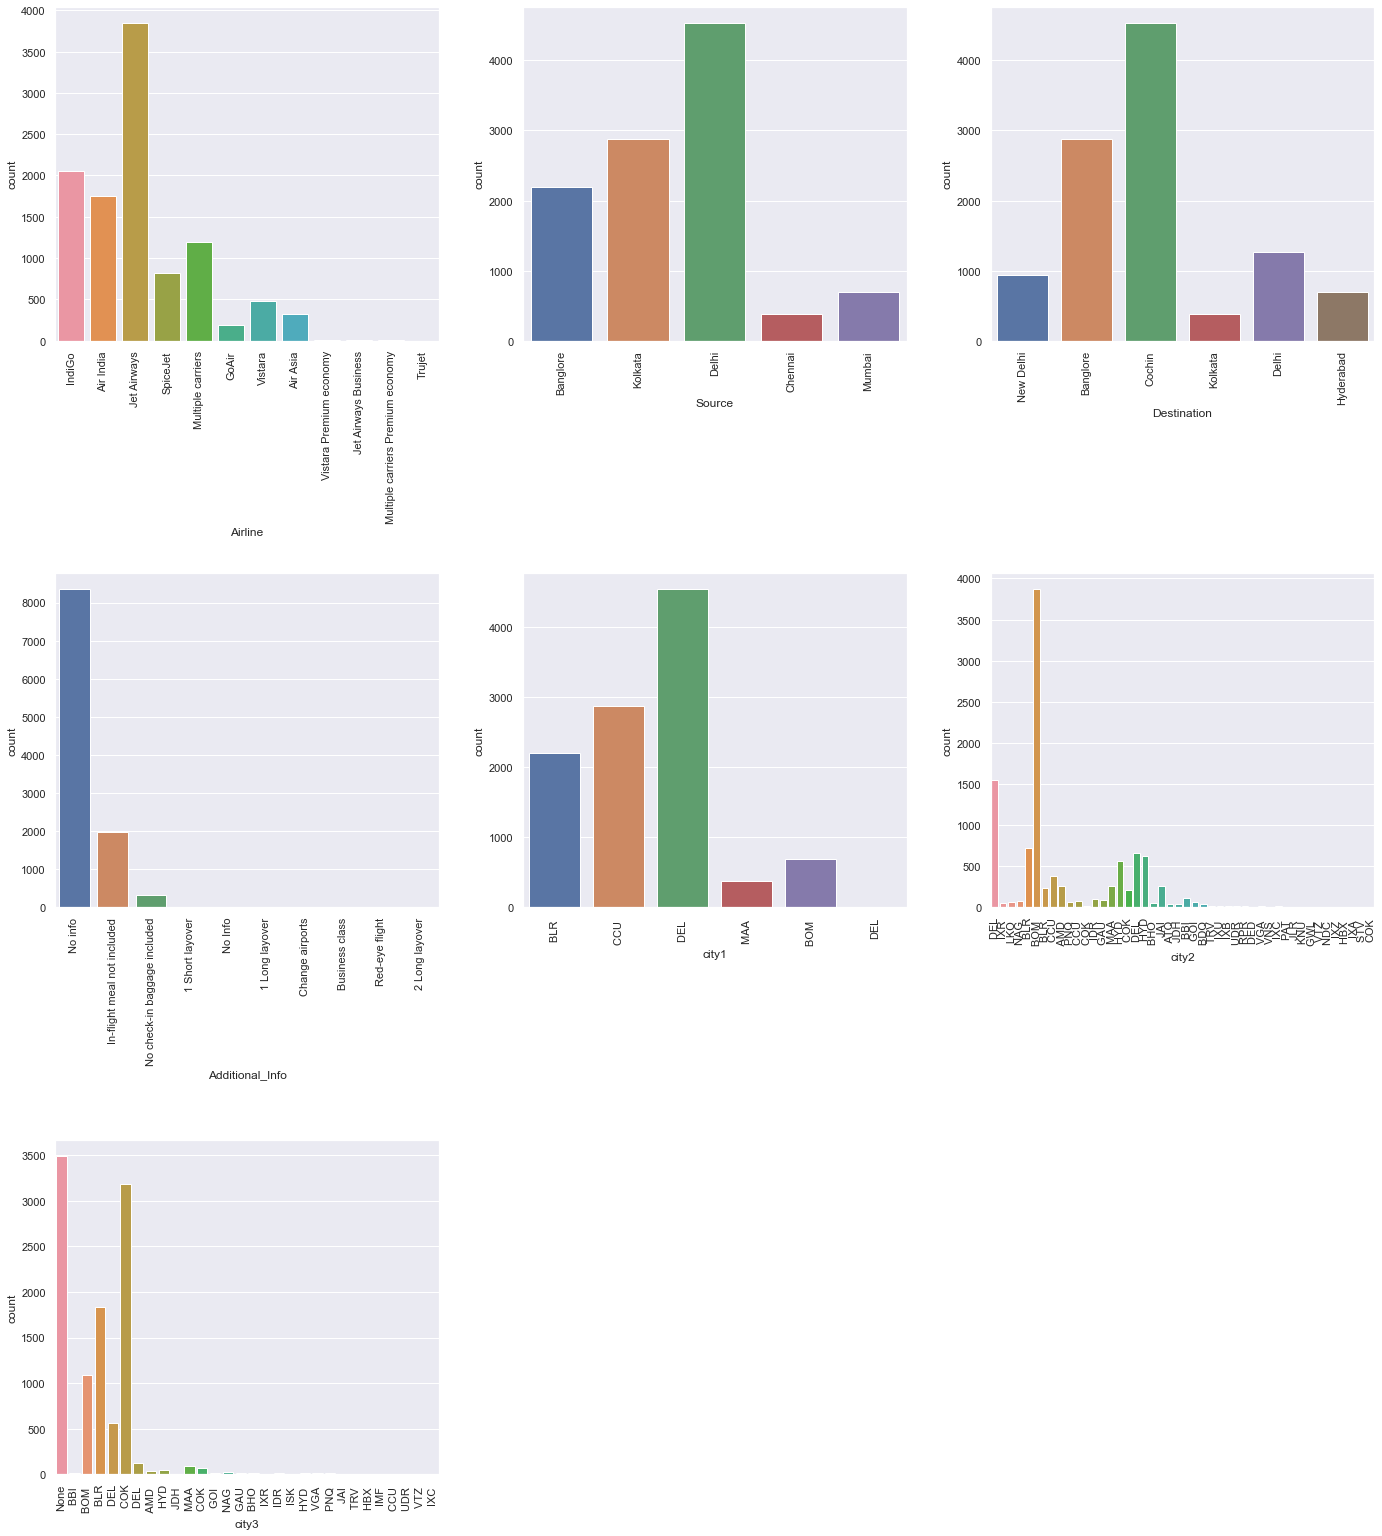

In [48]:
sns.set(rc={'figure.figsize':(20,45)})
pn=1
plt.figure(figsize=(20,45))
for i in categorical:
    plt.subplot(6,3,pn)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    pn+=1
plt.show()

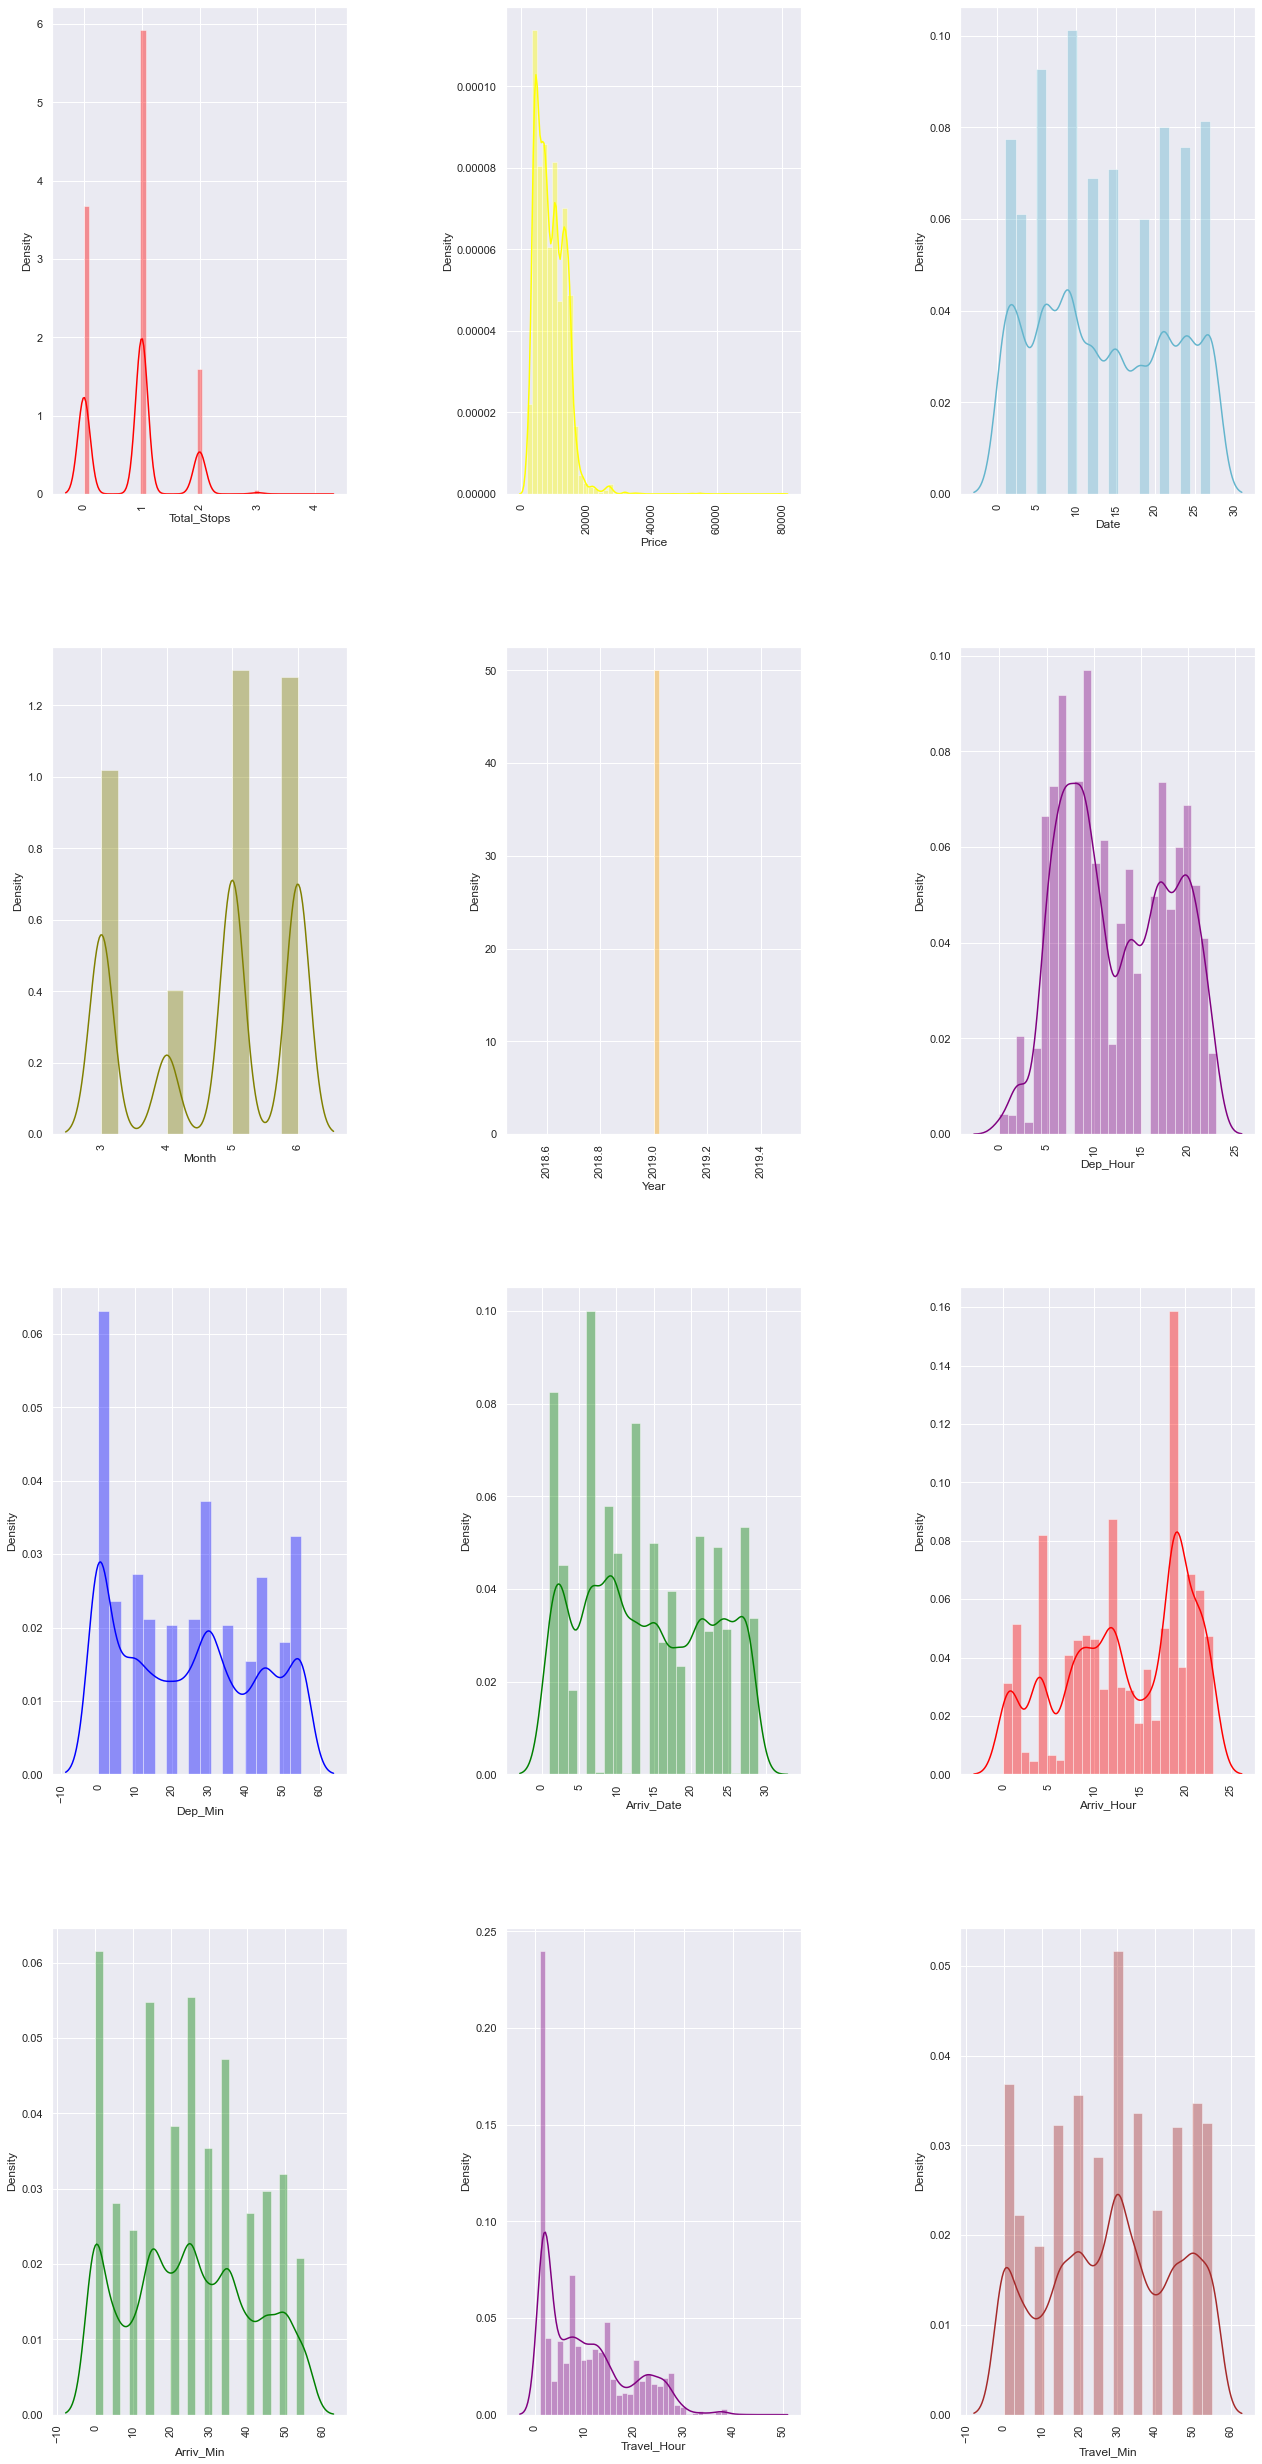

In [49]:
sns.set(rc={'figure.figsize':(20,45)})
pn=1
col=["red","yellow","c","olive","orange","purple","blue","green",'red','green','purple','brown']
plt.figure(figsize=(20,45))
j=0
for i in numerical:
    plt.subplot(5,3,pn)
    sns.distplot(data[i],color=col[j])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=8.0)
    pn+=1
    j+=1
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

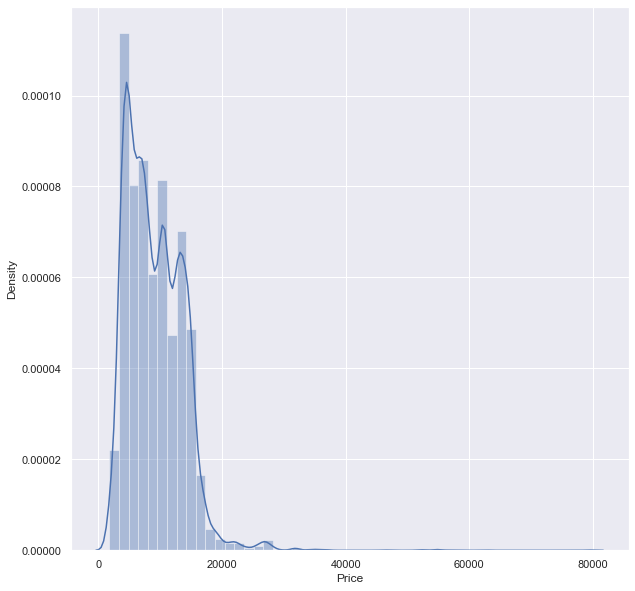

In [50]:
plt.figure(figsize=(10,10))
sns.distplot(data['Price'])

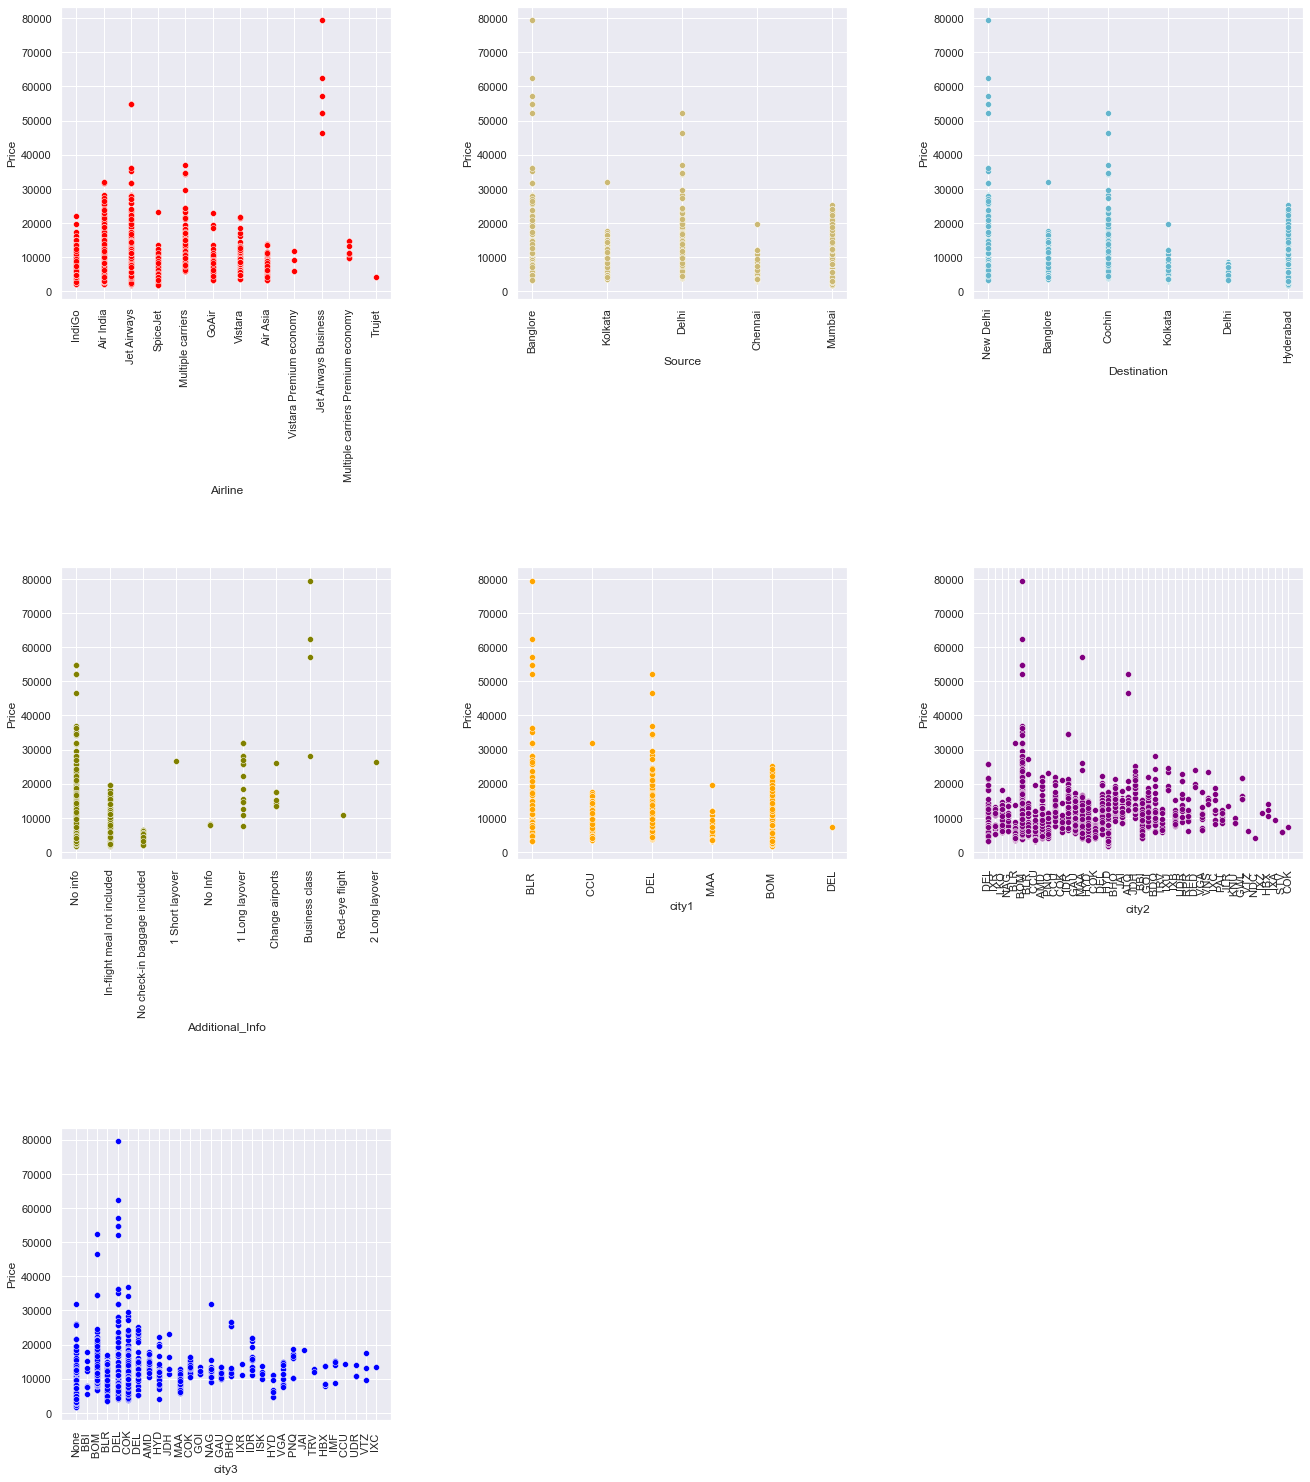

In [51]:
plt.figure(figsize=(20,45))
pn=1
col=["red","y","c","olive","orange","purple","blue","green",'red','green','purple','brown']
j=0
for i in categorical:
    plt.subplot(6,3,pn)
    sns.scatterplot(x=data[i],y=data['Price'],color=col[j])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=6)
    j+=1
    pn+=1

In [52]:
data[data['Price']>50000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,city1,city2,city3,Dep_Hour,Dep_Min,Arriv_Date,Arriv_Time,Arriv_Hour,Arriv_Min,Travel_Hour,Travel_Min
657,Jet Airways Business,Banglore,New Delhi,1,No info,52229,1,3,2019,BLR,BOM,DEL,5,45,1,10:45,10,45,5,0
1478,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,18,40,16,00:45,0,45,6,5
2618,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,22,50,16,05:05,5,5,6,15
2924,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,1,3,2019,BLR,BOM,DEL,5,45,1,11:25,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,1,3,2019,BLR,BOM,DEL,5,45,1,12:25,12,25,6,40
5439,Jet Airways,Banglore,New Delhi,1,No info,54826,1,3,2019,BLR,BOM,DEL,16,55,1,23:00,23,0,6,5
9715,Jet Airways Business,Delhi,Cochin,2,No info,52285,6,3,2019,DEL,ATQ,BOM,20,5,7,04:25,4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,1,3,2019,BLR,MAA,DEL,9,45,1,14:25,14,25,4,40


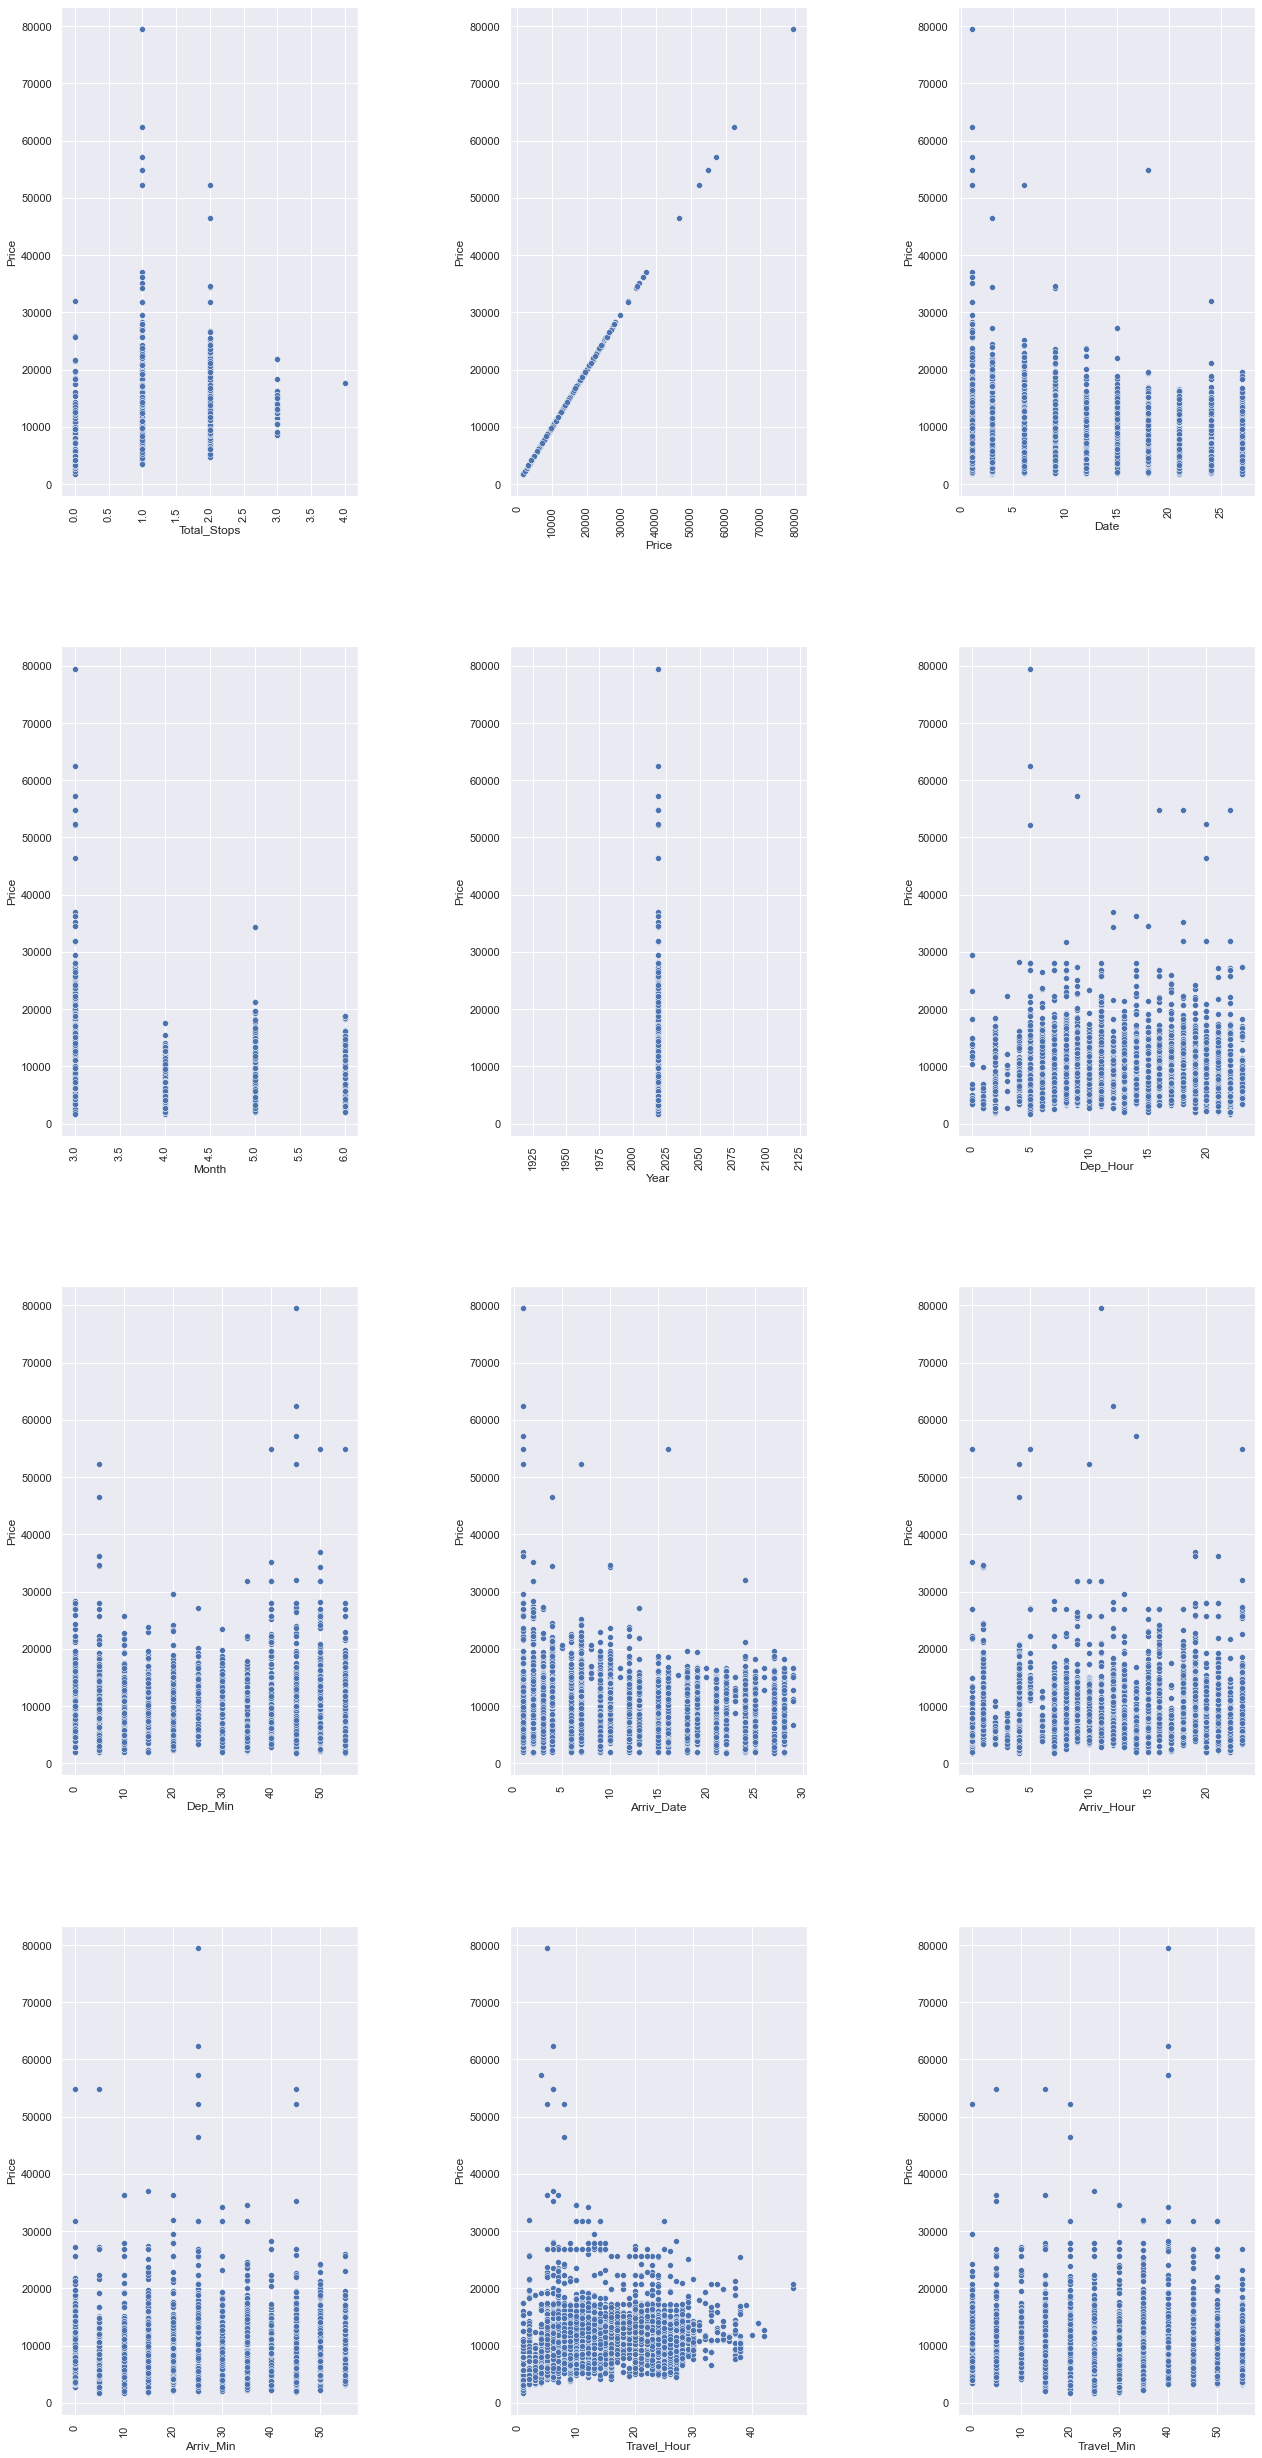

In [53]:
pn=1
plt.figure(figsize=(20,45))
for i in numerical:
    plt.subplot(5,3,pn)
    sns.scatterplot(data[i],data['Price'])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=8)
    pn+=1
    
    

In [54]:
data=data.drop(['Dep_Min','Arriv_Min','Travel_Min','Year', 'city1'],axis=1)

In [55]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,city2,city3,Dep_Hour,Arriv_Date,Arriv_Time,Arriv_Hour,Travel_Hour
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,DEL,None,22,22,01:10,1,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,IXR,BBI,5,1,13:15,13,7
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,LKO,BOM,9,10,04:25,4,19
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,NAG,BLR,18,12,23:30,23,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,NAG,DEL,16,1,21:35,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,BLR,None,19,9,22:25,22,2
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,BLR,None,20,27,23:20,23,2
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,DEL,None,8,27,11:20,11,3
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,DEL,None,11,1,14:10,14,2


In [56]:
data_num=data.select_dtypes(exclude='object')

In [57]:
num=[v for v in data_num]

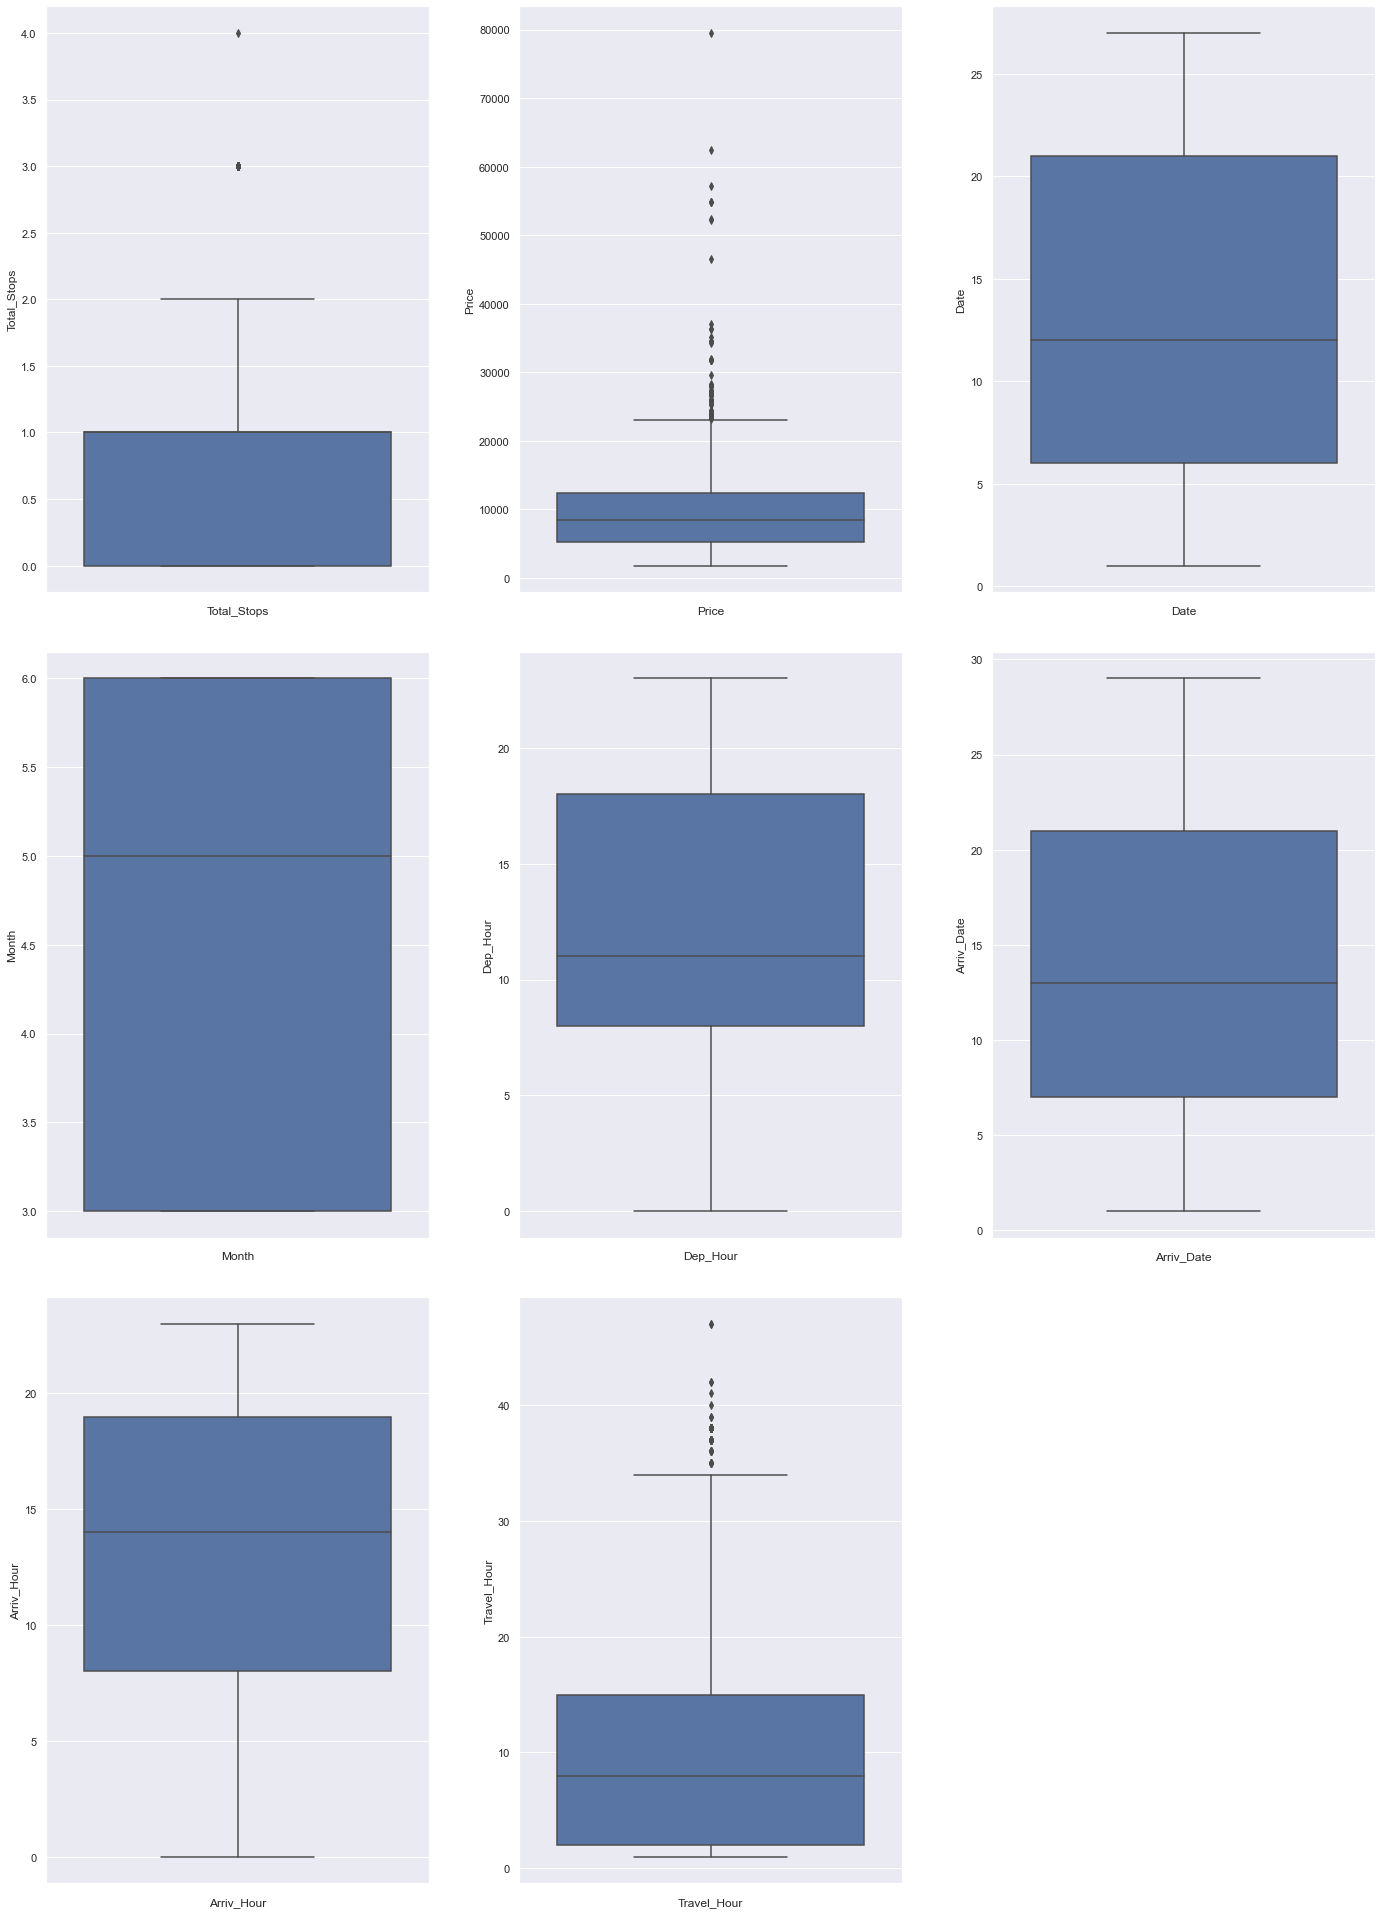

In [58]:
pn=1
plt.figure(figsize=(20,45))
for i in num:
    plt.subplot(5,3,pn)
    sns.boxplot(y=data[i])
    plt.xlabel(i)
    plt.tight_layout(pad=3)
    pn+=1

In [63]:
data.skew()

Total_Stops    0.317345
Price          1.813248
Date           0.118174
Month         -0.387708
Dep_Hour       0.113224
Arriv_Date     0.119667
Arriv_Hour    -0.369876
Travel_Hour    0.850822
dtype: float64

In [64]:
data['Travel_Hour']=np.log(data['Travel_Hour'])

In [65]:
data['Travel_Hour'].skew()

-0.26612233332369917

In [66]:
data=data.drop('Arriv_Time',axis=1)

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [68]:
for i in data.columns:
    if data[i].dtypes=='object':
        print(i)
        data[i]=le.fit_transform(data[i])

Airline
Source
Destination
Additional_Info
city2
city3


In [69]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,city2,city3,Dep_Hour,Arriv_Date,Arriv_Hour,Travel_Hour
0,3,0,5,0,8,3897,24,3,13,29,22,22,1,0.693147
1,1,3,0,2,8,7662,1,5,25,1,5,1,13,1.945910
2,4,2,1,2,8,13882,9,6,32,4,9,10,4,2.944439
3,3,3,0,1,8,6218,12,5,34,3,18,12,23,1.609438
4,3,0,5,1,8,13302,1,3,34,8,16,1,21,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,8,4107,9,4,5,29,19,9,22,0.693147
10679,1,3,0,0,8,4145,27,4,5,29,20,27,23,0.693147
10680,4,0,2,0,8,7229,27,4,13,29,8,27,11,1.098612
10681,10,0,5,0,8,12648,1,3,13,29,11,1,14,0.693147


In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [71]:
x1=data.drop('Price',axis=1)
y=data['Price']

In [72]:
dataset=sc.fit_transform(x1)

In [73]:
x=pd.DataFrame(dataset,columns=x1.columns)

In [74]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,city2,city3,Dep_Hour,Arriv_Date,Arriv_Hour,Travel_Hour
0,-0.410805,-1.658435,2.416778,-1.220477,0.499921,1.237288,-1.467707,0.137204,1.395015,1.654268,0.955750,-1.800319,-1.183304
1,-1.261152,0.890299,-0.973732,1.741835,0.499921,-1.475307,0.250153,1.634890,-1.082280,-1.303000,-1.524648,-0.050813,0.052178
2,0.014369,0.040721,-0.295630,1.741835,0.499921,-0.531796,1.109082,2.508541,-0.816856,-0.607172,-0.461621,-1.362943,1.036933
3,-0.410805,0.890299,-0.973732,0.260679,0.499921,-0.177979,0.250153,2.758155,-0.905330,0.958440,-0.225392,1.407109,-0.279653
4,-0.410805,-1.658435,2.416778,0.260679,0.499921,-1.475307,-1.467707,2.758155,-0.462956,0.610527,-1.524648,1.115525,-0.499718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,-1.220477,0.499921,-0.531796,-0.608777,-0.861254,1.395015,1.132397,-0.579735,1.261317,-1.183304
10678,-1.261152,0.890299,-0.973732,-1.220477,0.499921,1.591104,-0.608777,-0.861254,1.395015,1.306354,1.546321,1.407109,-1.183304
10679,0.014369,-1.658435,0.382472,-1.220477,0.499921,1.591104,-0.608777,0.137204,1.395015,-0.781129,1.546321,-0.342397,-0.783432
10680,2.565411,-1.658435,2.416778,-1.220477,0.499921,-1.475307,-1.467707,0.137204,1.395015,-0.259258,-1.524648,0.094979,-1.183304


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [76]:
rf=RandomForestRegressor()

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [78]:
model=rf.fit(x_train,y_train)

In [79]:
rf.score(x_train,y_train)

0.9748939061735893

In [80]:
rf.score(x_test,y_test)

0.8576105548398085

In [81]:
y_pred=model.predict(x_test)

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [83]:
print(mean_squared_error(y_pred,y_test))

2882385.2852562163


In [84]:
print(np.sqrt(mean_squared_error(y_pred,y_test)))

1697.7589008031193


In [85]:
print('R2 score is',r2_score(y_test,y_pred))

R2 score is 0.8576105548398085


In [86]:
pred_values=pd.DataFrame({'Actual':y_test,'Pred':y_pred})

In [87]:
pred_values

,Actual,Pred
6075,16655,16752.57
3544,4959,5492.00
9291,9187,8965.49
5032,3858,3779.70
2483,12898,12878.52
...,...,...
7918,14714,15935.55
5858,10844,10869.72
2689,5000,5943.30
4486,3100,3113.02


In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,500,150)]
min_samples_split=[int(x) for x in np.linspace(1,20,10)]
min_samples_leaf=[1,2,4,6,8,10]

In [111]:
random_grid={'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
            'n_estimators':[int(x) for x in np.linspace(200,2000,10)],'min_samples_leaf':min_samples_leaf}

In [112]:
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 13, 16, 19, 23, 26, 29, 33, 36, 39, 42, 46, 49, 52, 56, 59, 62, 65, 69, 72, 75, 79, 82, 85, 88, 92, 95, 98, 102, 105, 108, 111, 115, 118, 121, 125, 128, 131, 134, 138, 141, 144, 148, 151, 154, 157, 161, 164, 167, 171, 174, 177, 181, 184, 187, 190, 194, 197, 200, 204, 207, 210, 213, 217, 220, 223, 227, 230, 233, 236, 240, 243, 246, 250, 253, 256, 259, 263, 266, 269, 273, 276, 279, 282, 286, 289, 292, 296, 299, 302, 305, 309, 312, 315, 319, 322, 325, 328, 332, 335, 338, 342, 345, 348, 352, 355, 358, 361, 365, 368, 371, 375, 378, 381, 384, 388, 391, 394, 398, 401, 404, 407, 411, 414, 417, 421, 424, 427, 430, 434, 437, 440, 444, 447, 450, 453, 457, 460, 463, 467, 470, 473, 476, 480, 483, 486, 490, 493, 496, 500], 'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_leaf': [1, 2, 4, 6, 8, 10]}


In [115]:
rf_rcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=10,verbose=2,random_state=0,n_jobs=-1)

In [116]:
rf_rcv.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


KeyboardInterrupt: 

In [117]:
rf_rcv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

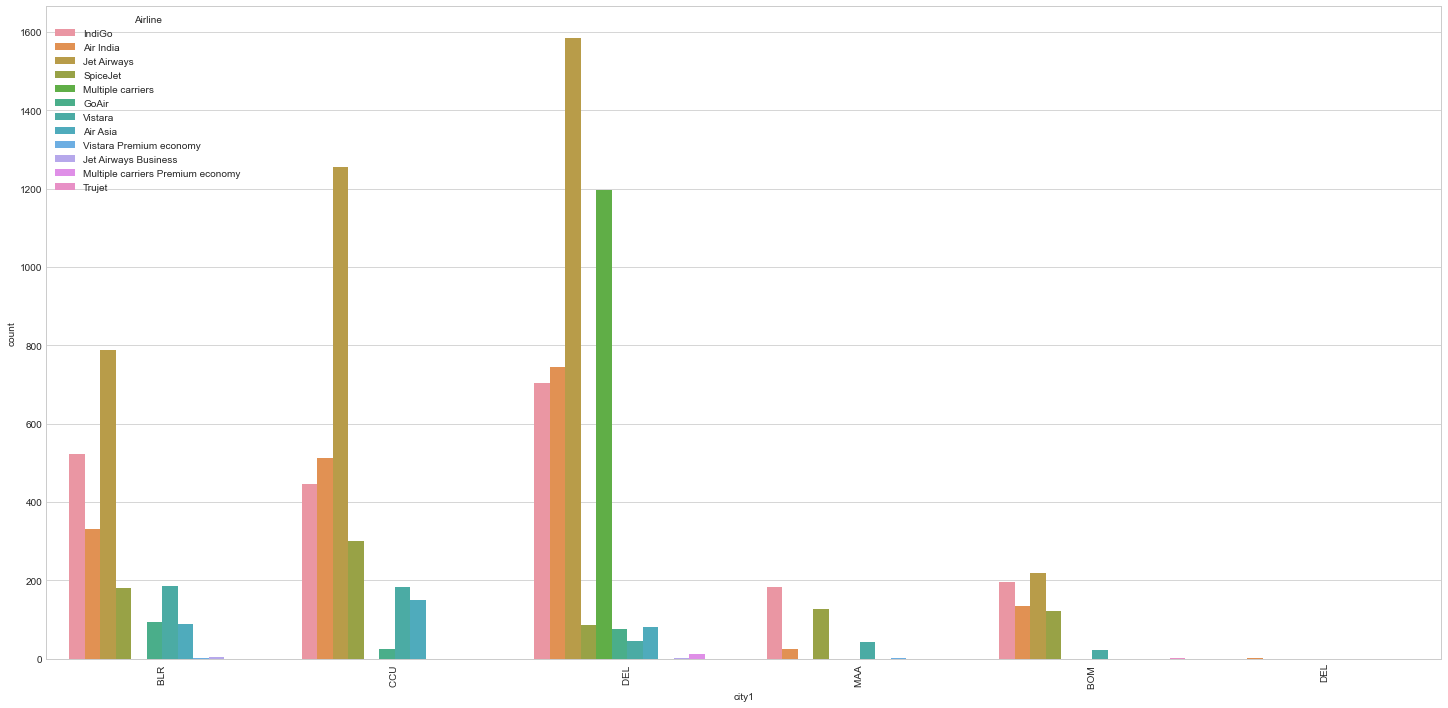

In [174]:
plt.figure(figsize=(25,12))
sns.countplot(df['city1'],hue=df['Airline'])
plt.xticks(rotation=90)
plt.show()

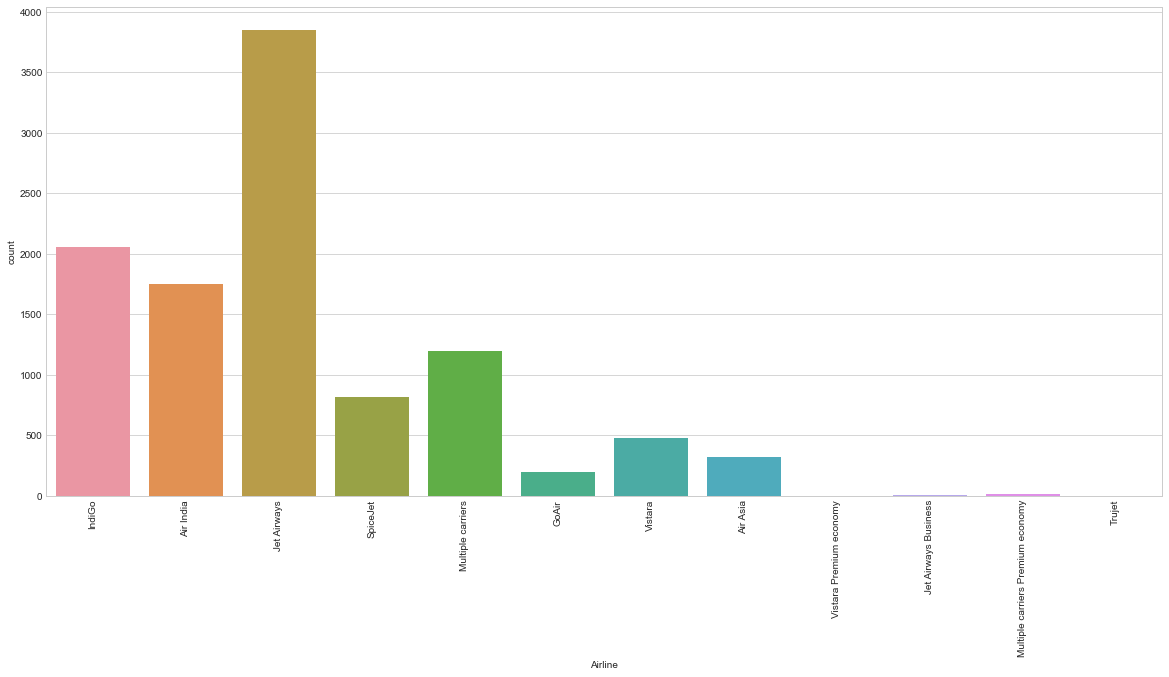

In [151]:
plt.figure(figsize=(20,9))
sns.countplot(df['Airline'])
plt.xticks(rotation=90)
plt.show()

In [152]:
df['Price'].median()

8372.0

(1000.0, 20000.0)

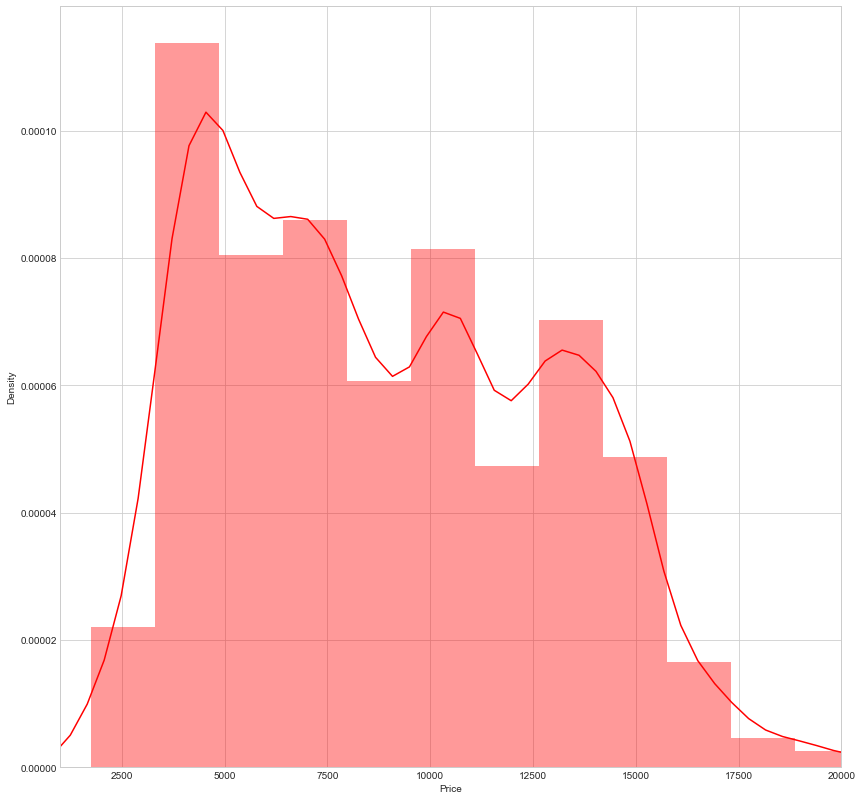

In [179]:

plt.figure(figsize=(14,14))
sns.distplot(df['Price'],color='r')
plt.xlim(1000,20000)

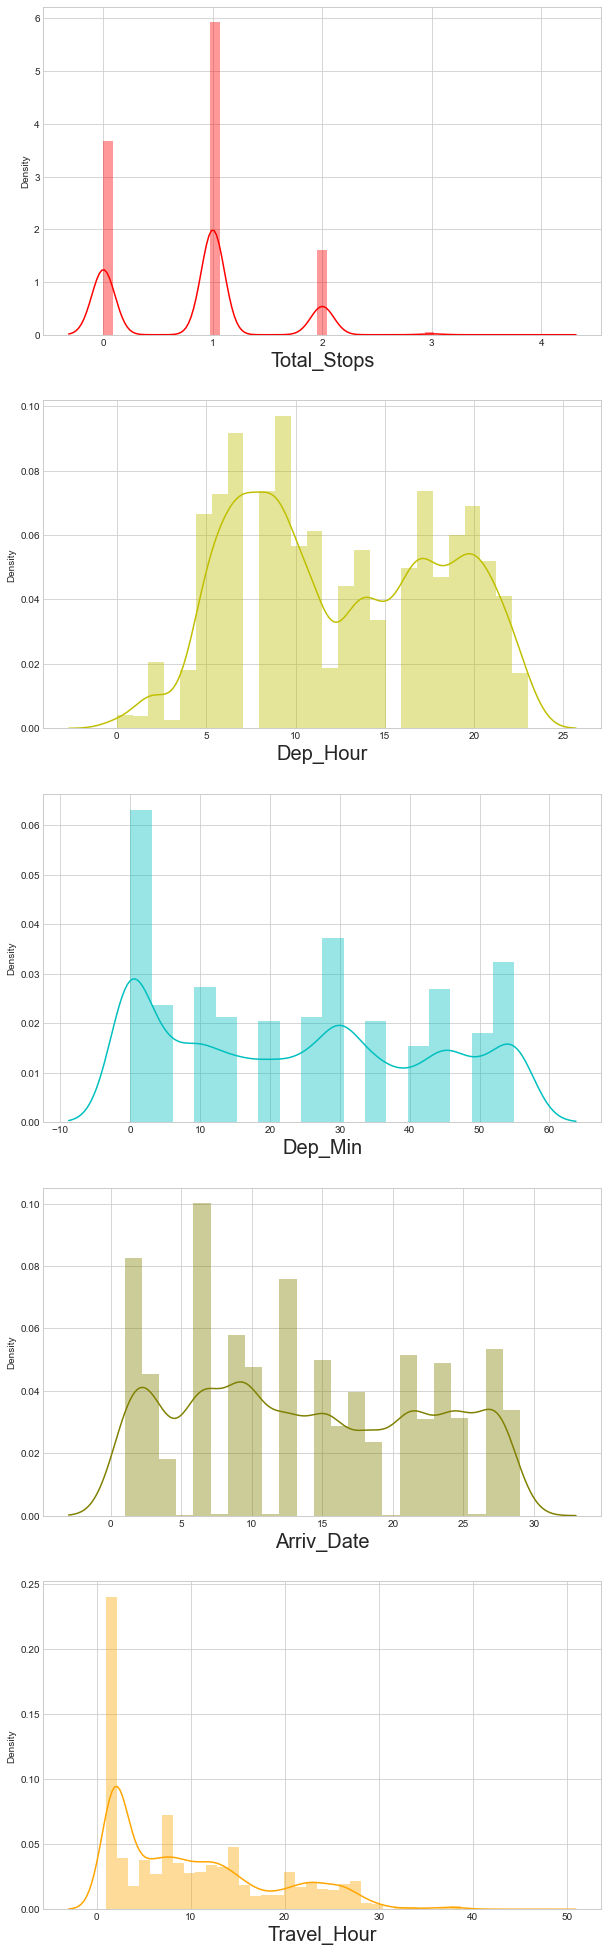

In [154]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,35))
col=["r","y","c","olive","orange","peru","b","g"]
plotnumber=1
j=0
for i in m:
    if plotnumber<=9:
        ax=plt.subplot(5,1,plotnumber)
        sns.distplot(df[i],color=col[j])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
        j+=1


In [155]:
l=['Airline','Additional_Info','city1','city2','city3']

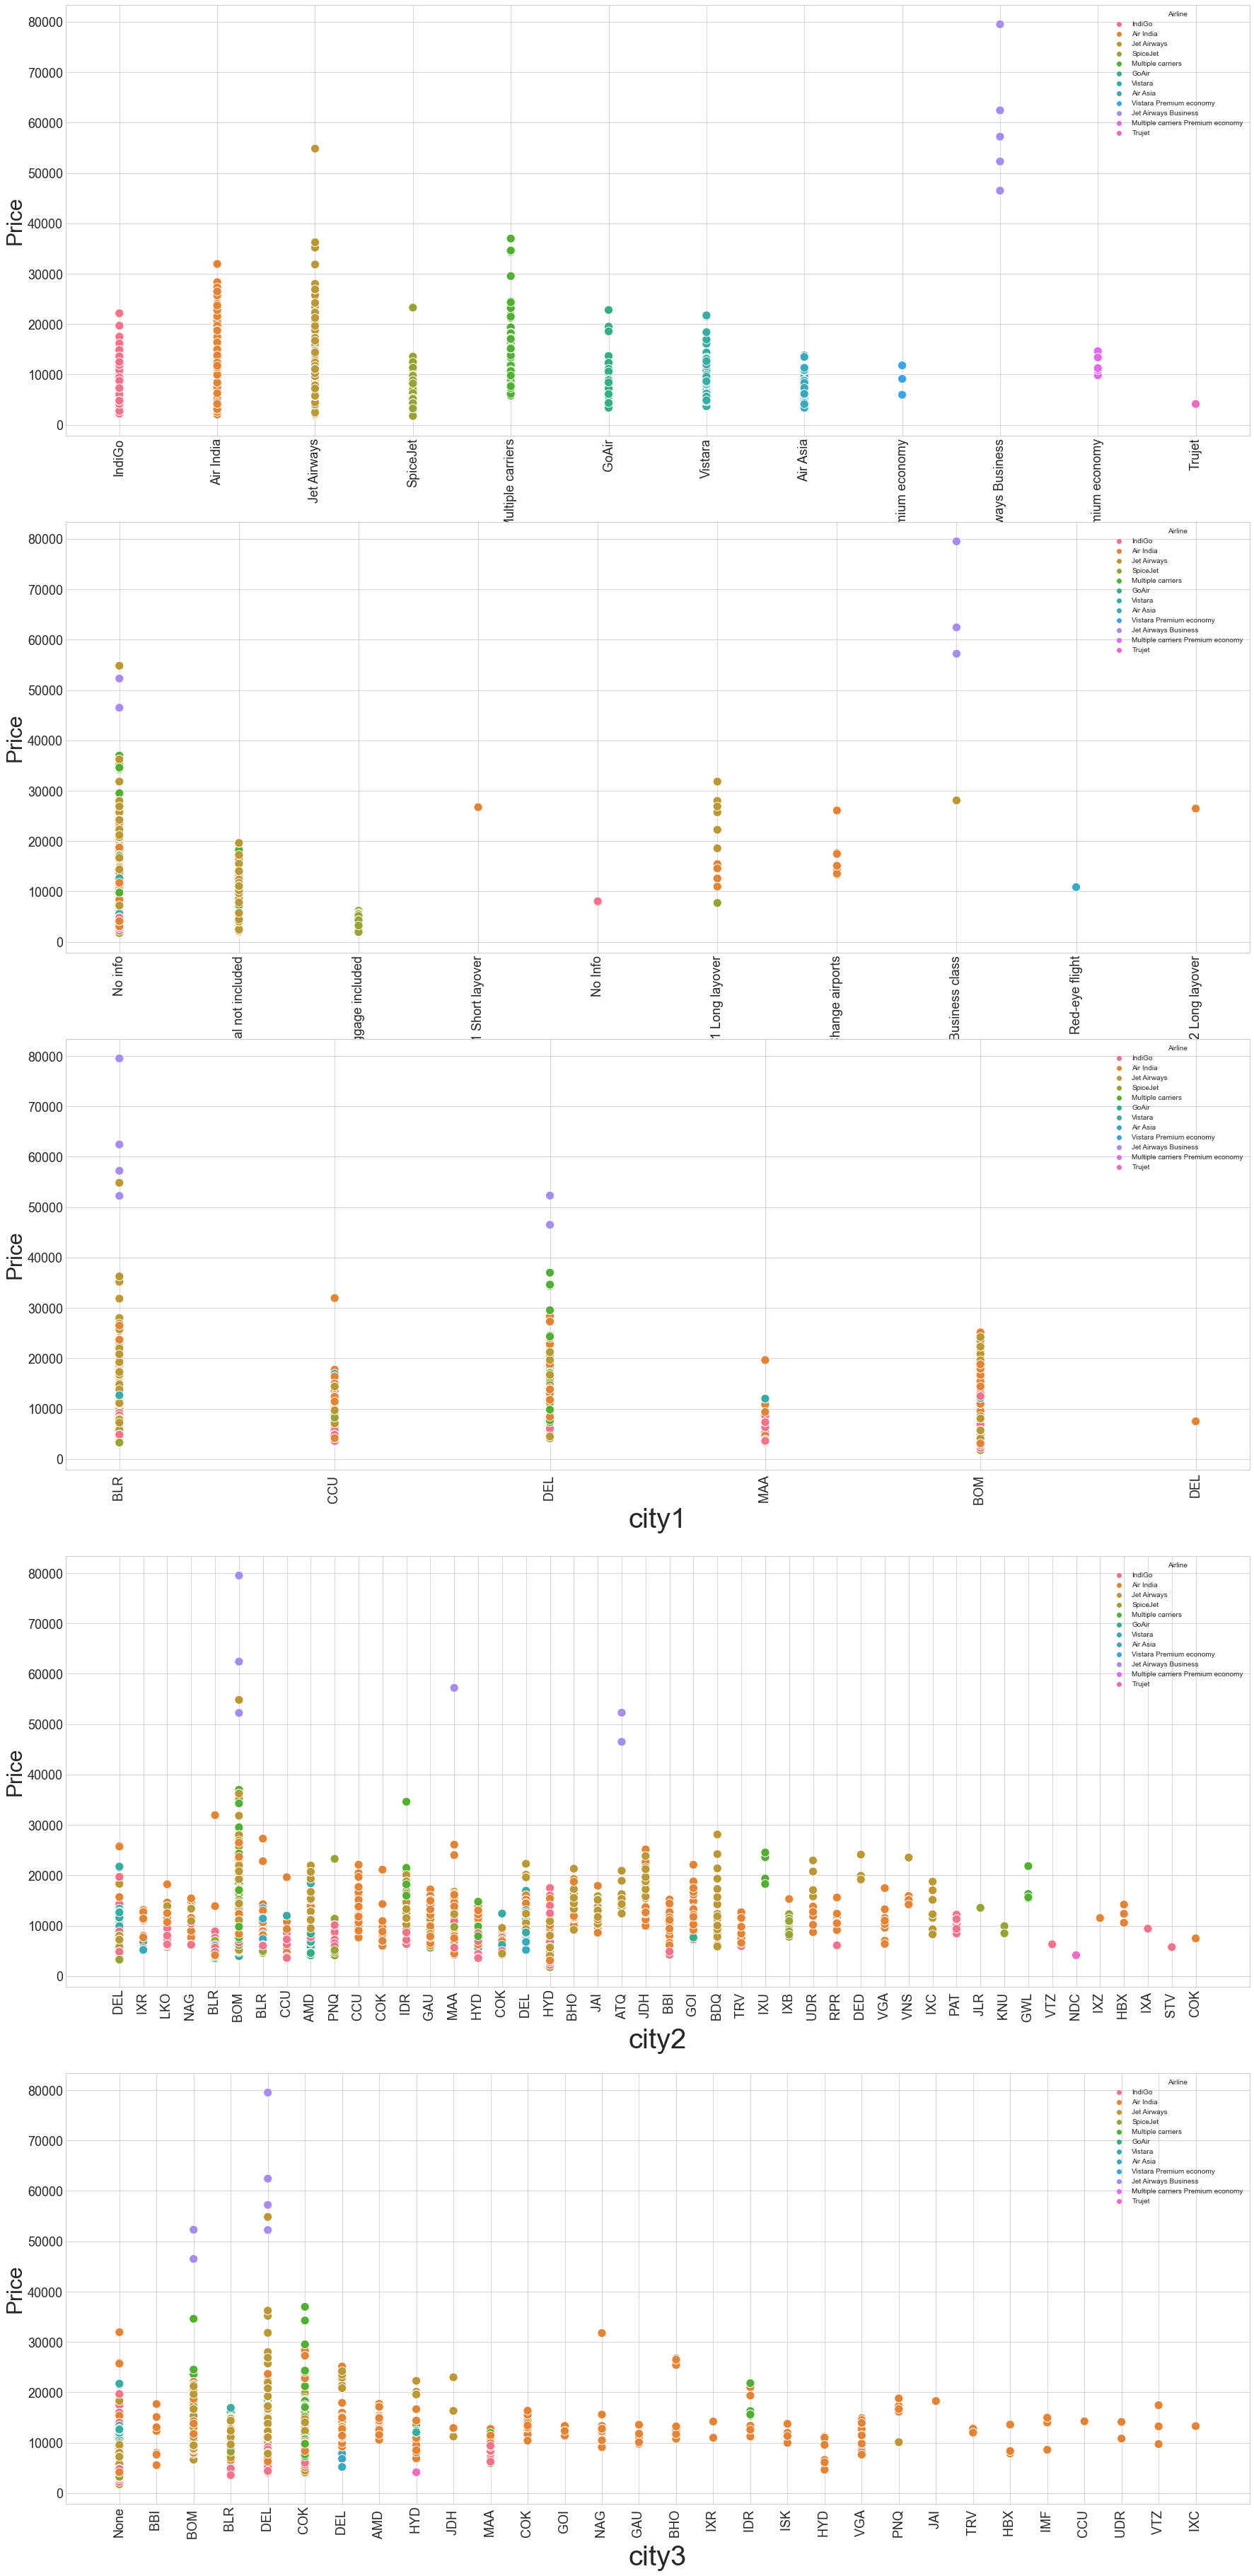

In [156]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(30,65))
col=["r","y","c","olive","orange","peru","b","g"]
plotnumber=1
j=0
for i in l:
    if plotnumber<=9:
        ax=plt.subplot(5,1,plotnumber)
        sns.scatterplot(df[i],y=df['Price'],hue=df['Airline'],s=150,alpha=1)
        plt.xlabel(i,fontsize=40)
        plt.ylabel('Price',fontsize=30)
        plt.xticks(rotation=90,fontsize=18)
        plt.yticks(fontsize=18)
        plotnumber+=1
        j+=1

In [159]:
threshold=0.5

In [7]:
df.describe(include=object)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,5,6,128,222,1343,368,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,4537,4537,2376,233,423,550,5625,8345


(1) To check which airline has taken most of the flight???

(2) To check which was the busiest month i.e most flight taken off???

(3) To check which source of destination was most used and most common route???

(4) To check the most affordable flight in all the routes???

(5) Which airlines covers maximum number of routes????

In [8]:
df['Airline'].value_counts()                                                           # Shows that Jet Airways have max count

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [9]:
df.sort_values('Date_of_Journey',inplace=True)
df.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45 02 Mar,13h 5m,1 stop,No info,26890
1,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,8h 5m,1 stop,1 Long layover,7744
2,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,12h 20m,1 stop,No info,27992
3,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
4,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25 02 Mar,23h 45m,1 stop,No info,25735
...,...,...,...,...,...,...,...,...,...,...,...
10678,Multiple carriers,2019-12-06,Delhi,Cochin,DEL → BOM → COK,09:15,19:00,9h 45m,1 stop,No info,11622
10679,IndiGo,2019-12-06,Kolkata,Banglore,CCU → MAA → BLR,08:10,13:00,4h 50m,1 stop,No info,5069
10680,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,22:50,19:00 13 Jun,20h 10m,1 stop,No info,14714
10681,Air Asia,2019-12-06,Kolkata,Banglore,CCU → DEL → BLR,07:35,23:30,15h 55m,1 stop,No info,5192


In [10]:
a=df.groupby('Date_of_Journey')['Airline'].value_counts()               #Show how much fligts taken offf each day
a.head(25)


Date_of_Journey  Airline                
2019-01-03       Jet Airways                 71
                 Air India                   53
                 IndiGo                      39
                 SpiceJet                    12
                 Vistara                      6
                 Multiple carriers            5
                 Air Asia                     4
                 GoAir                        4
                 Jet Airways Business         4
                 Vistara Premium economy      1
2019-01-04       Jet Airways                119
                 Air India                   47
                 IndiGo                      35
                 Vistara                     24
                 SpiceJet                    21
                 Air Asia                     6
                 GoAir                        5
2019-01-05       Jet Airways                123
                 Air India                   51
                 IndiGo                      41

In [8]:
b=pd.crosstab(df.Date_of_Journey,df.Airline,margins=True)
b

Airline,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,All
Date_of_Journey,,,,,,,,,,,,,
2019-01-03 00:00:00,4,53,4,39,71,4,5,0,12,0,6,1,199
2019-01-04 00:00:00,6,47,5,35,119,0,0,0,21,0,24,0,257
2019-01-05 00:00:00,9,51,6,41,123,0,5,0,23,0,19,0,277
2019-01-06 00:00:00,9,46,6,69,117,0,65,0,20,0,10,0,342
2019-03-03 00:00:00,7,75,9,98,37,1,58,0,17,0,12,1,315
2019-03-04 00:00:00,5,18,6,35,25,0,0,0,18,0,3,0,110
2019-03-05 00:00:00,5,9,3,34,15,0,0,0,18,0,6,0,90
2019-03-06 00:00:00,10,39,6,68,116,0,63,0,24,0,7,0,333
2019-03-15 00:00:00,3,42,4,43,44,0,0,0,19,0,7,0,162


In [9]:
b.drop('All',inplace=True)

In [10]:
b[b['All']==max(b['All'])]

Airline,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,All
Date_of_Journey,,,,,,,,,,,,,
2019-05-18 00:00:00,13,85,6,73,214,0,63,0,31,0,19,0,504


In [11]:
m=[v for v in df['Date_of_Journey']]
n=[]
for i in m:
    n.append(i.month)

In [18]:
a={}                                                                                   # This will tell about the busiest month
y=[]
s=[]
for i in set(n):
    y.append(i)
    s.append(n.count(i))
    a['month']=y
    a['No. of flight']=s
a=pd.DataFrame(a)
a.set_index("month",inplace=True)
a.sort_values(by='No. of flight',ascending=False)


,No. of flight
month,
6,2536
3,2211
5,2074
9,1406
1,1075
12,957
4,424


In [23]:
df.groupby(['Airline','Route'])['Price'].value_counts().head(25)  #This shows varios prices for all differnt routes for differnt airlines

Airline   Route            Price
Air Asia  BLR → DEL        3383     31
                           4483     19
                           4282     17
                           7120      4
                           4284      3
                           4482      3
                           5615      2
                           7652      2
                           6135      1
                           6181      1
                           6477      1
                           7074      1
                           7080      1
                           8420      1
                           10715     1
                           10873     1
          CCU → BBI → BLR  5162     10
                           6857      6
                           5554      1
          CCU → BLR        4409     29
                           3807     19
                           4107     11
                           4384     10
                           3782      4
                           4082

In [50]:
df.groupby(['Airline','Route'])['Price'].min()                        #This shows the minmum price for each flight in each route


Airline                  Route                
Air Asia                 BLR → DEL                3383
                         CCU → BBI → BLR          5162
                         CCU → BLR                3782
                         CCU → DEL → BLR          5192
                         CCU → IXR → DEL → BLR    5192
                                                  ... 
Vistara                  CCU → DEL → BLR          7770
                         DEL → COK                4851
                         MAA → CCU                3687
Vistara Premium economy  BLR → DEL                5969
                         MAA → CCU                9125
Name: Price, Length: 209, dtype: int64

In [68]:
a=df.groupby('Airline')['Route'].nunique()                                          # This shows Air India covers the max routes
a=pd.DataFrame(a)
a.sort_values(by='Route',ascending=False)

,Route
Airline,
Air India,92
IndiGo,36
Jet Airways,33
SpiceJet,14
GoAir,9
Air Asia,6
Multiple carriers,6
Vistara,6
Jet Airways Business,3


(6) To check no. of fligts available in each city???

(7) To devide all the flights in morning,afternoon,evenning and Night and to check which was most opted???

(8) To find out the minimum duration for each routes for each flight?

(9) To give the inflight meals if accoring to their duration of complettion???

In [89]:
b=df.groupby('Source')['Airline'].nunique()                                     # Shows no. of flights avilable from each source
b=pd.DataFrame(b)
b.sort_values(by='Airline',ascending=False)

,Airline
Source,
Delhi,10
Banglore,9
Kolkata,7
Mumbai,6
Chennai,5


In [80]:
df.groupby('Source')['Airline'].unique()

Source
Banglore    [IndiGo, Jet Airways, Air India, Vistara, Air ...
Chennai     [Air India, Vistara, IndiGo, SpiceJet, Vistara...
Delhi       [Jet Airways, Multiple carriers, Air India, Sp...
Kolkata     [Air India, IndiGo, SpiceJet, Jet Airways, Vis...
Mumbai      [Vistara, Air India, Jet Airways, IndiGo, Spic...
Name: Airline, dtype: object

In [171]:
x={'morning': [5435], 'afternoon': [1811], 'evening': [3437]}

In [172]:
x=pd.DataFrame(x)
x

,morning,afternoon,evening
0,5435,1811,3437


In [110]:
c={'morning':0,'afternoon':0,'evening':0}                                               # This will devide all flights in slots
for i in df['Dep_Time']:
    i=i.replace(':','')
    i=int(i)
    if 99<=i<=1200:
        c['morning']+=1
    elif 1200<=i<=1699:
        c['afternoon']+=1
    else:
        c['evening']+=1
c
        
    
    

{'morning': 5435, 'afternoon': 1811, 'evening': 3437}

In [115]:
df.groupby(['Airline','Route'])['Duration'].unique()

Airline                  Route                
Air Asia                 BLR → DEL                                                 [2h 45m, 2h 50m]
                         CCU → BBI → BLR                                           [3h 40m, 3h 35m]
                         CCU → BLR                                                 [2h 35m, 2h 30m]
                         CCU → DEL → BLR                           [15h 55m, 11h 50m, 12h, 15h 20m]
                         CCU → IXR → DEL → BLR                                     [8h 20m, 7h 30m]
                                                                        ...                        
Vistara                  CCU → DEL → BLR          [12h 45m, 25h 50m, 11h 40m, 15h 30m, 26h 20m, ...
                         DEL → COK                                                 [3h 10m, 2h 55m]
                         MAA → CCU                                                 [2h 15m, 2h 20m]
Vistara Premium economy  BLR → DEL                   

In [132]:
df.groupby(['Airline','Route'])['Duration'].min()                #Shows the minimum time bween differnt routes for all airlines

Airline                  Route                
Air Asia                 BLR → DEL                 2h 45m
                         CCU → BBI → BLR           3h 35m
                         CCU → BLR                 2h 30m
                         CCU → DEL → BLR          11h 50m
                         CCU → IXR → DEL → BLR     7h 30m
                                                   ...   
Vistara                  CCU → DEL → BLR          10h 30m
                         DEL → COK                 2h 55m
                         MAA → CCU                 2h 15m
Vistara Premium economy  BLR → DEL                 2h 35m
                         MAA → CCU                 2h 15m
Name: Duration, Length: 209, dtype: object

In [130]:
df.groupby(['Airline','Route','Duration'])['Price'].unique()

Airline                  Route            Duration
Air Asia                 BLR → DEL        2h 45m            [3383, 4483, 4482, 5615, 6135, 10873, 6477]
                                          2h 50m      [4483, 6181, 3383, 5615, 4284, 4282, 7074, 765...
                         CCU → BBI → BLR  3h 35m                                     [6857, 5162, 5554]
                                          3h 40m                                           [5162, 6857]
                         CCU → BLR        2h 30m      [3807, 5530, 4409, 4384, 4107, 3782, 5620, 408...
                                                                            ...                        
Vistara                  MAA → CCU        2h 15m                   [3687, 7414, 4842, 3739, 6627, 5944]
                                          2h 20m                                                [11982]
Vistara Premium economy  BLR → DEL        2h 35m                                                [11793]
             

In [131]:
df.groupby(['Airline','Route','Duration'])['Price'].min()                          # Show the minimum prices for all the routes

Airline                  Route            Duration
Air Asia                 BLR → DEL        2h 45m       3383
                                          2h 50m       3383
                         CCU → BBI → BLR  3h 35m       5162
                                          3h 40m       5162
                         CCU → BLR        2h 30m       3782
                                                      ...  
Vistara                  MAA → CCU        2h 15m       3687
                                          2h 20m      11982
Vistara Premium economy  BLR → DEL        2h 35m      11793
                                          2h 50m       5969
                         MAA → CCU        2h 15m       9125
Name: Price, Length: 1210, dtype: int64

In [145]:
df.replace({'Additional_Info':'No info'},'In-flight meal included',regex=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,new
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,In-flight meal included,3897,In-flight meal included
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,In-flight meal included,7662,In-flight meal included
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,In-flight meal included,13882,In-flight meal included
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,In-flight meal included,6218,In-flight meal included
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,In-flight meal included,13302,In-flight meal included
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,In-flight meal included,4107,In-flight meal included
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,In-flight meal included,4145,In-flight meal included
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,In-flight meal included,7229,In-flight meal included
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,In-flight meal included,12648,In-flight meal included
